A __pre-trained__ model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. You either use the pretrained model as it is, or use __transfer learning__ to customize this model to a given task.

The intuition behind transfer learning is that if a model trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch training a large model on a large dataset.

<a href=https://www.tensorflow.org/tutorials/images/transfer_learning>Source</a>

Keras contains 10 pretrained models for image classification which are trained 
on <a href='http://www.image-net.org/'>ImageNet</a>.

ImageNet is a dataset of over 15 million labeled high-resolution images belonging to roughly 22,000 categories. 

__Simplified CNN architecture:__
- Feature extractor (Convolutions+Pooling)
- Classifier (Fully Connected layers)

<img src = "https://qph.fs.quoracdn.net/main-qimg-9eba847cb0342a019bbd49bafe010b47" width = 800>

## VGG

<img src = "https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png" width = 800>

In [0]:
from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [25]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f72124a0b38> False
<keras.layers.convolutional.Conv2D object at 0x7f72124a0630> False
<keras.layers.convolutional.Conv2D object at 0x7f72124a0940> False
<keras.layers.pooling.MaxPooling2D object at 0x7f72124b6b00> False
<keras.layers.convolutional.Conv2D object at 0x7f7211c25a20> False
<keras.layers.convolutional.Conv2D object at 0x7f7211c292e8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7211c2c630> False
<keras.layers.convolutional.Conv2D object at 0x7f7211c32668> False
<keras.layers.convolutional.Conv2D object at 0x7f7211c377f0> False
<keras.layers.convolutional.Conv2D object at 0x7f7211c3c550> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7211c48550> False
<keras.layers.convolutional.Conv2D object at 0x7f7211c4deb8> False
<keras.layers.convolutional.Conv2D object at 0x7f7211c53710> False
<keras.layers.convolutional.Conv2D object at 0x7f7211c58630> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7211be4470>

In [26]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              33555456  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 3075      
Total params: 48,273,219
Trainable params: 40,637,955
Non-trainable params: 7,635,264
_________________________________________________________________


In [0]:
import os
import zipfile

local_zip = '/content/animal_db_notebook_ready.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [0]:
base_dir = '/content/animal_db_notebook_ready'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen  = ImageDataGenerator(rescale=1./255)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    # color_mode='grayscale',
                                                    target_size=(256,256),
                                                    shuffle=True)     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  val_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode='categorical',
                                                        #  color_mode='grayscale',
                                                         target_size=(256,256)) 

Found 260 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [0]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('small_last4.h5')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
13/13 [==============================] - 13s 983ms/step - loss: 1.7797 - acc: 0.4000 - val_loss: 0.8373 - val_acc: 0.7167
Epoch 2/30
13/13 [==============================] - 5s 412ms/step - loss: 0.7562 - acc: 0.6769 - val_loss: 0.5232 - val_acc: 0.7833
Epoch 3/30
13/13 [==============================] - 5s 416ms/step - loss: 0.5122 - acc: 0.7923 - val_loss: 0.5008 - val_acc: 0.8500
Epoch 4/30
13/13 [==============================] - 5s 416ms/step - loss: 0.1996 - acc: 0.9000 - val_loss: 0.4327 - val_acc: 0.8000
Epoch 5/30
13/13 [==============================] - 5s 416ms/step - loss: 0.0881 - acc: 0.9692 - val_loss: 0.6017 - val_acc: 0.8500
Epoch 6/30
13/13 [==============================] - 5s 418ms/step - loss: 0.0212 - acc: 0.9962 - val_loss: 0.5488 - val_acc: 0.8167
Epoch 7/30
13/13 [==============================] - 5s 420ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.

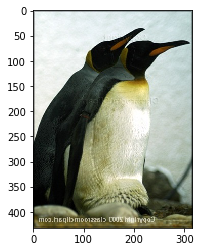




['bear', 'camel', 'penguin']



Softmax Output: [[0. 0. 1.]]



/content/animal_db_notebook_ready/test/penguin/158_0133.jpg is a penguin





In [29]:
from keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

path = '/content/animal_db_notebook_ready/test/penguin/158_0133.jpg'
img = image.load_img(path, target_size=(256, 256), grayscale=False, interpolation='bilinear')
plt.imshow(image.load_img(path), cmap='gray')
plt.show()

model = tf.keras.models.load_model('/content/small_last4.h5')
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
  
classes_pred = model.predict(x)
classes = ['bear', 'camel', 'penguin']
print(f'\n\n\n{classes}')
print(f'\n\n\nSoftmax Output: {classes_pred}')
print(f'\n\n\n{path} is a {classes[classes_pred.argmax()]}\n\n\n')
